## 1.Environment Preparation

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import boto3

## 2. Data Loading

In [8]:
# Initialize boto3 S3 client
s3_client = boto3.client("s3")

# Load data from s3 bucket
bucket_name = "e-commerce-datalake"

years = range(2023, 2025)  # Example years
months = range(1, 13)  # All months

data_frames = []

for year in years:
    for month in months:
        folder_prefix = f"processed/shortcut/year={year}/month={month}/"
        response = s3_client.list_objects_v2(Bucket=bucket_name, Prefix=folder_prefix)

        if 'Contents' in response:
            for obj in response['Contents']:
                key = obj['Key']
                if key.endswith(".parquet"):
                    print(f"Loading file: {key}")
                    s3_path = f"s3://{bucket_name}/{key}"
                    df = pd.read_parquet(s3_path)
                    data_frames.append(df)

# Combine all data
if data_frames:
    data = pd.concat(data_frames, ignore_index=True)
    print("Data loaded successfully!")
else:
    print("No data found in the specified structure.")

Loading file: processed/shortcut/year=2023/month=12/part-00000-09ae8dd1-b083-449a-8475-bc20c2140789.c000.snappy.parquet
Loading file: processed/shortcut/year=2023/month=12/part-00001-09ae8dd1-b083-449a-8475-bc20c2140789.c000.snappy.parquet
Loading file: processed/shortcut/year=2023/month=12/part-00002-09ae8dd1-b083-449a-8475-bc20c2140789.c000.snappy.parquet
Loading file: processed/shortcut/year=2023/month=12/part-00003-09ae8dd1-b083-449a-8475-bc20c2140789.c000.snappy.parquet
Loading file: processed/shortcut/year=2024/month=1/part-00000-09ae8dd1-b083-449a-8475-bc20c2140789.c000.snappy.parquet
Loading file: processed/shortcut/year=2024/month=1/part-00001-09ae8dd1-b083-449a-8475-bc20c2140789.c000.snappy.parquet
Loading file: processed/shortcut/year=2024/month=1/part-00002-09ae8dd1-b083-449a-8475-bc20c2140789.c000.snappy.parquet
Loading file: processed/shortcut/year=2024/month=1/part-00003-09ae8dd1-b083-449a-8475-bc20c2140789.c000.snappy.parquet
Loading file: processed/shortcut/year=2024/m

In [12]:
data.head()

,Ad_CPC,Ad_CTR,Ad_Spend,Category,Clicks,Conversion_Rate,Customer_ID,Discount_Applied,Impressions,Product_ID,...,Revenue,Transaction_Date,Transaction_ID,Units_Sold,Discount_Amount,day,Day_of_Week,Is_Weekend,year,month
0,0.41,0.0658,26.98,Electronics,30,0.13,Customer_10077,0.17,236,Product_857,...,323.27,2023-12-07,a46c6ef7-9948-471f-97b2-9d7fda360f2d,224,66.21,7,5,0,2023,12
1,1.74,0.1259,219.07,Toys,34,0.10,Customer_935,0.25,342,Product_353,...,74.45,2023-12-07,56099861-3bfa-47c2-accd-03f0400a5934,79,24.82,7,5,0,2023,12
2,0.81,0.0862,69.82,Clothing,41,0.56,Customer_11252,0.15,73,Product_880,...,380.09,2023-12-07,2256430e-788c-44b3-9e64-d88236d7c5e0,118,67.07,7,5,0,2023,12
3,0.90,0.1560,140.40,Clothing,30,0.18,Customer_9320,0.12,166,Product_159,...,325.11,2023-12-07,92071bd1-a176-43dd-b7d1-bfe2521876d9,76,44.33,7,5,0,2023,12
4,1.38,0.1674,231.01,Home Appliances,28,0.68,Customer_9297,0.30,41,Product_731,...,133.98,2023-12-07,b085fdef-2099-4b2d-a9c9-e5896e8b78a4,169,57.42,7,5,0,2023,12


In [75]:
data.count()

Ad_CPC                    100000
Ad_CTR                    100000
Ad_Spend                  100000
Category                  100000
Clicks                    100000
Conversion_Rate           100000
Customer_ID               100000
Discount_Applied          100000
Impressions               100000
Product_ID                100000
Region                    100000
Revenue                   100000
Transaction_Date          100000
Transaction_ID            100000
Units_Sold                100000
Discount_Amount           100000
day                       100000
Day_of_Week               100000
Is_Weekend                100000
year                      100000
month                     100000
Category_encoded          100000
Region_encoded            100000
Revenue_per_Unit          100000
Revenue_per_Click         100000
CPA                       100000
ROI                       100000
Revenue_to_Ad_Spend       100000
Revenue_to_Impressions    100000
dtype: int64

## 3.Data preparation

In [13]:
# missing value handling
print(data.isnull().sum())
data.fillna(0, inplace=True)

Ad_CPC              0
Ad_CTR              0
Ad_Spend            0
Category            0
Clicks              0
Conversion_Rate     0
Customer_ID         0
Discount_Applied    0
Impressions         0
Product_ID          0
Region              0
Revenue             0
Transaction_Date    0
Transaction_ID      0
Units_Sold          0
Discount_Amount     0
day                 0
Day_of_Week         0
Is_Weekend          0
year                0
month               0
dtype: int64


## 4.Exploratory Data Analysis (EDA)

### Univariate Analysis

Numerical Features

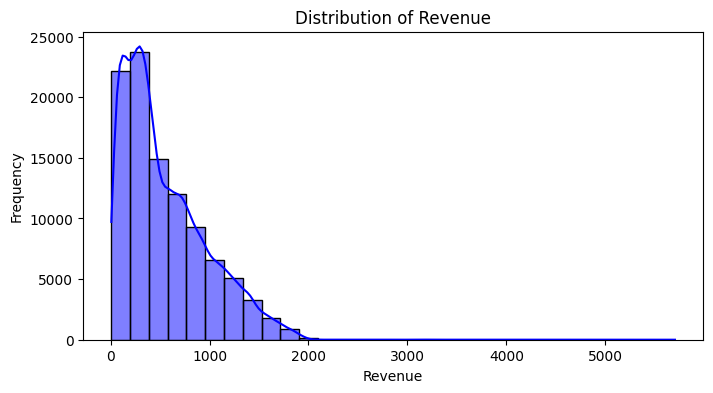

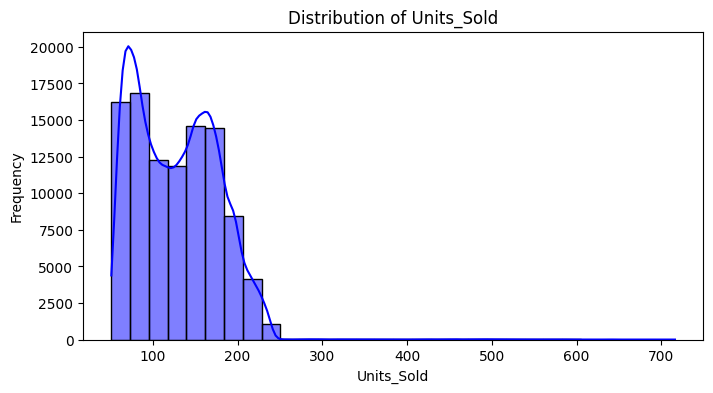

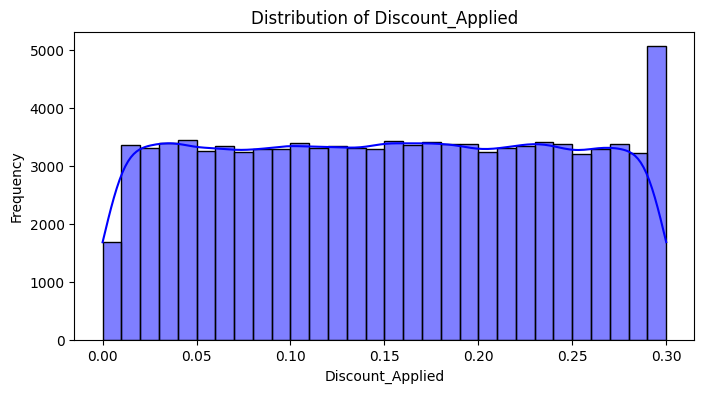

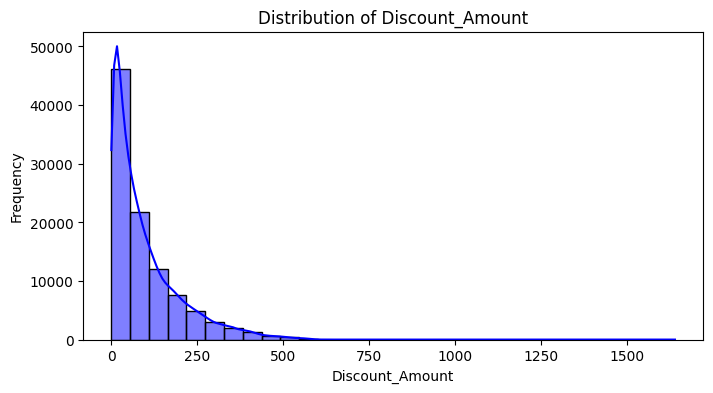

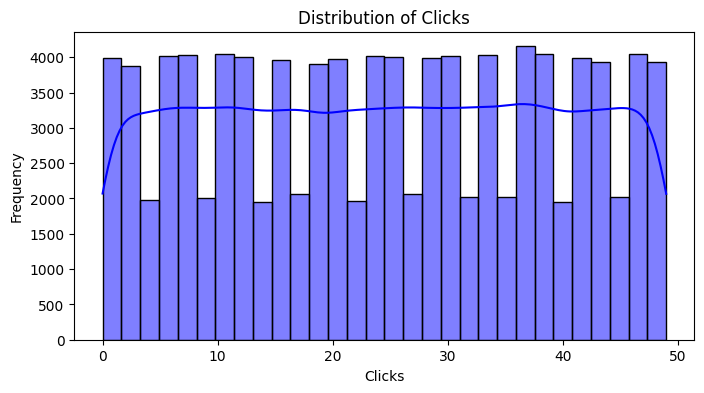

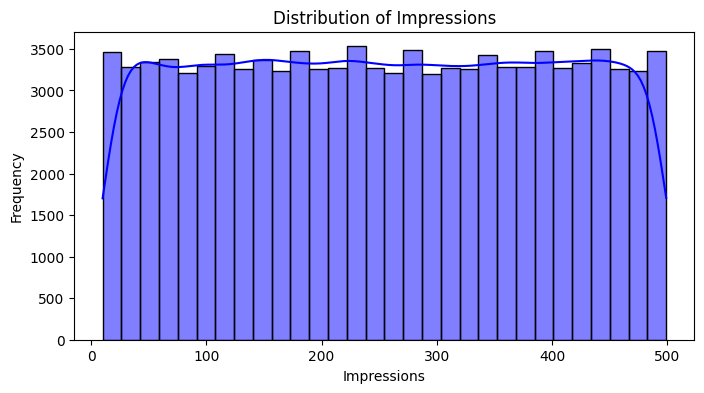

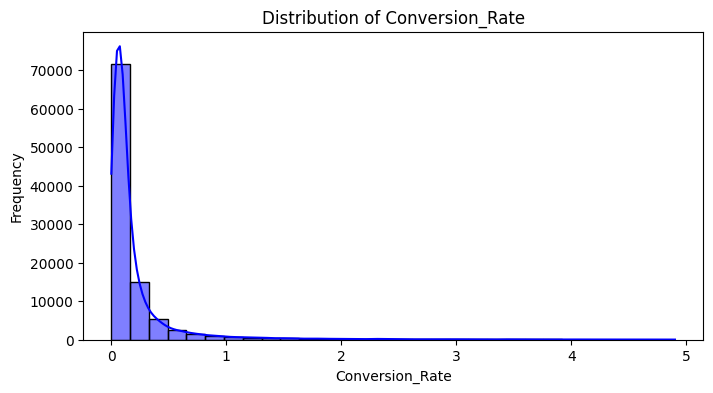

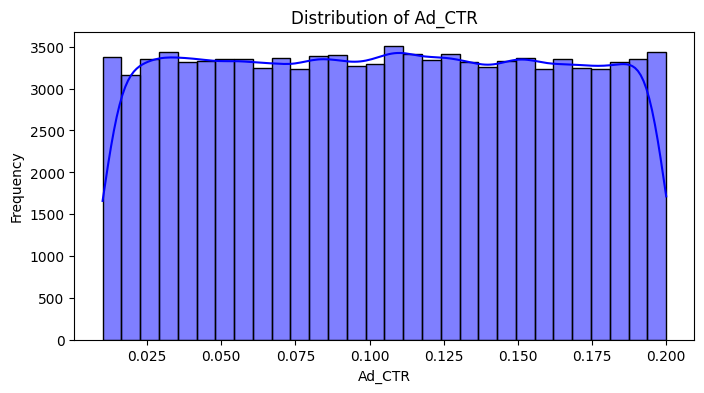

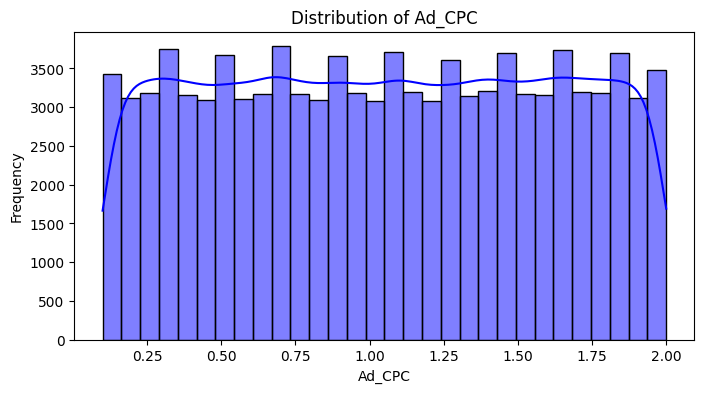

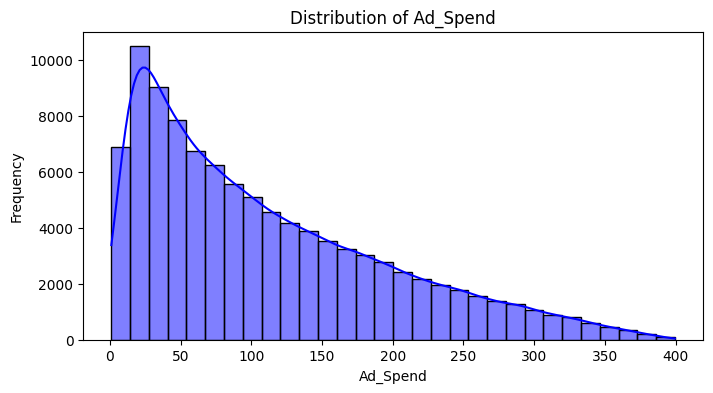

In [14]:
# List of numerical columns
numerical_columns = ['Revenue', 'Units_Sold', 'Discount_Applied','Discount_Amount', 'Clicks', 
                     'Impressions', 'Conversion_Rate', 'Ad_CTR', 'Ad_CPC', 'Ad_Spend']

# Plot histograms
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], bins=30, kde=True, color='blue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

Categorical Features

In [16]:
data.columns

Index(['Ad_CPC', 'Ad_CTR', 'Ad_Spend', 'Category', 'Clicks', 'Conversion_Rate',
       'Customer_ID', 'Discount_Applied', 'Impressions', 'Product_ID',
       'Region', 'Revenue', 'Transaction_Date', 'Transaction_ID', 'Units_Sold',
       'Discount_Amount', 'day', 'Day_of_Week', 'Is_Weekend', 'year', 'month'],
      dtype='object')

C:\Users\fsukr\AppData\Local\Temp\ipykernel_30060\776770774.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='viridis')


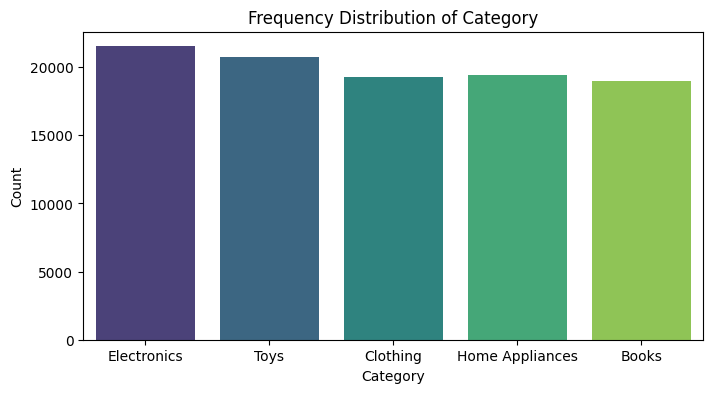

C:\Users\fsukr\AppData\Local\Temp\ipykernel_30060\776770774.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='viridis')


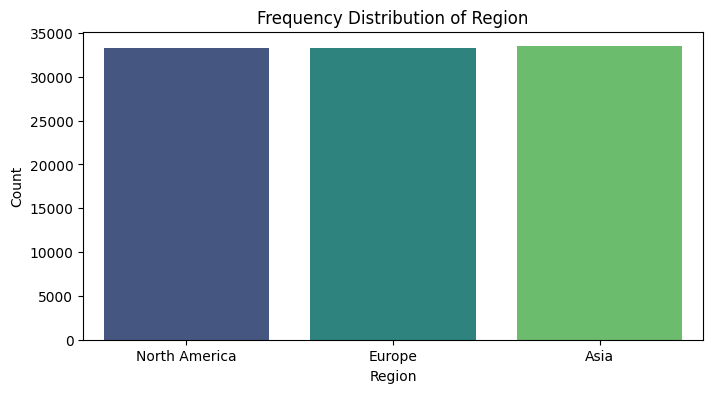

C:\Users\fsukr\AppData\Local\Temp\ipykernel_30060\776770774.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='viridis')


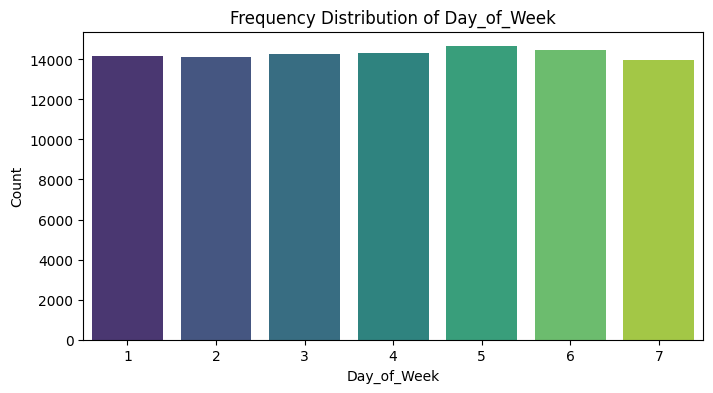

C:\Users\fsukr\AppData\Local\Temp\ipykernel_30060\776770774.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='viridis')


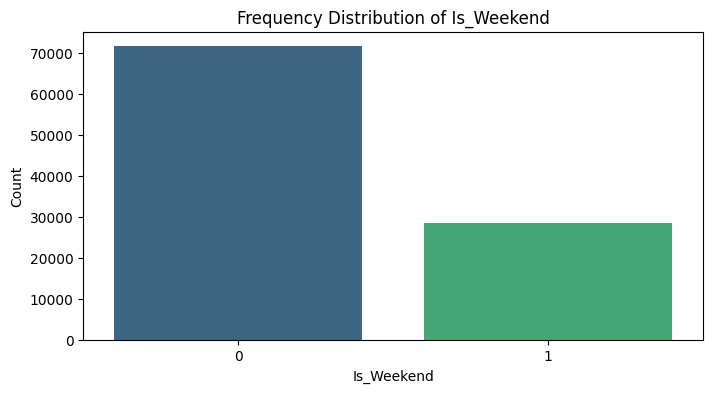

In [18]:
# List of categorical columns
categorical_columns = ['Category','Region' , 'Day_of_Week', 'Is_Weekend']

# Bar plots for categorical variables
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=col, palette='viridis')
    plt.title(f"Frequency Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

### Bivariate Analysis

Revenue vs Categorical Variables

C:\Users\fsukr\AppData\Local\Temp\ipykernel_30060\1208483651.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Category', y='Revenue', palette='Set3')


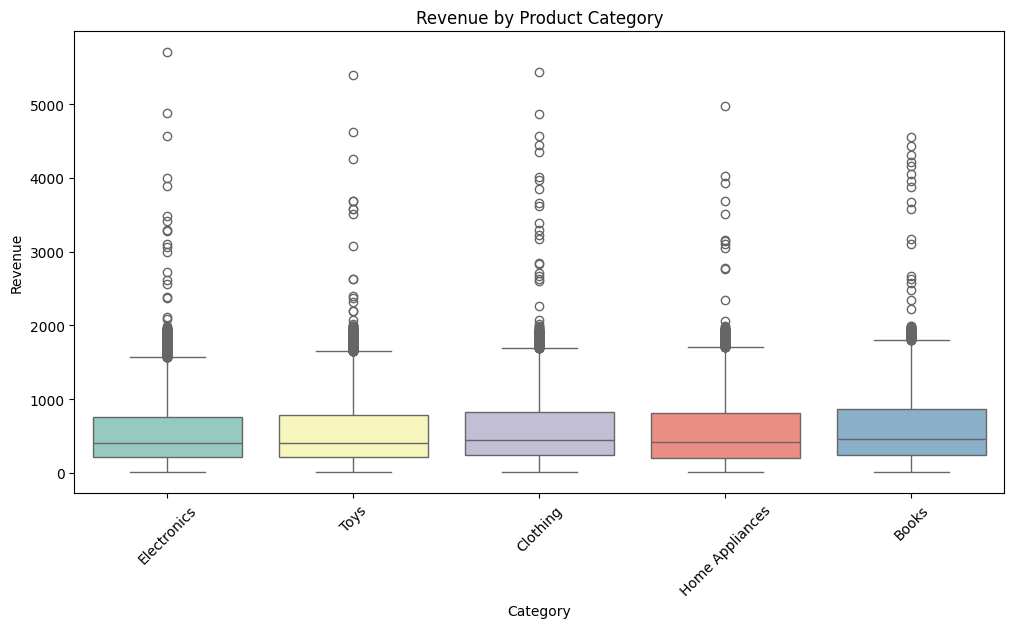

C:\Users\fsukr\AppData\Local\Temp\ipykernel_30060\1208483651.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Day_of_Week', y='Revenue', palette='Set2')


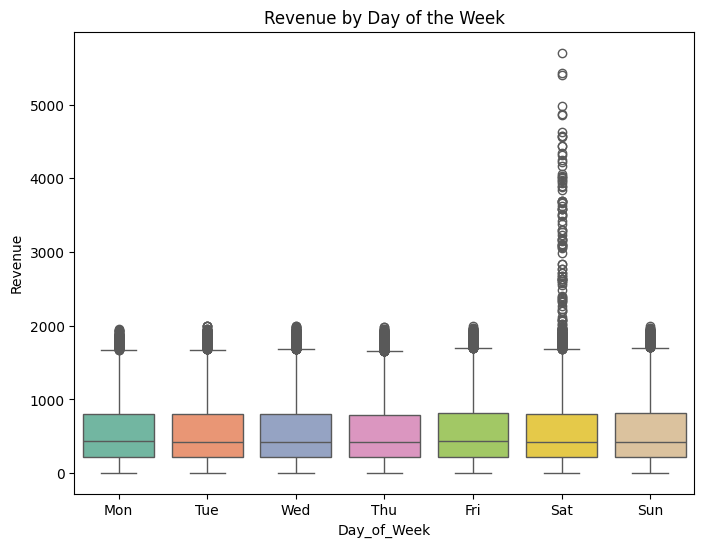

In [20]:
# Revenue by Category
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Category', y='Revenue', palette='Set3')
plt.title("Revenue by Product Category")
plt.xticks(rotation=45)
plt.show()

# Revenue by Day of Week
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Day_of_Week', y='Revenue', palette='Set2')
plt.title("Revenue by Day of the Week")
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

Advertising Metrics

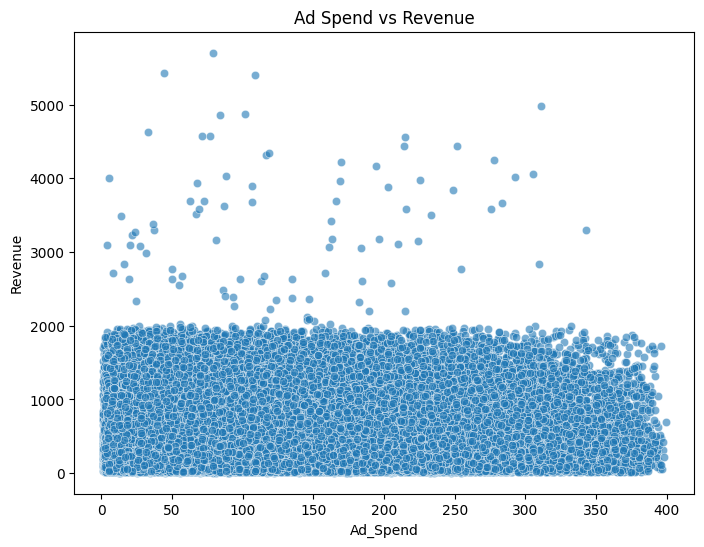

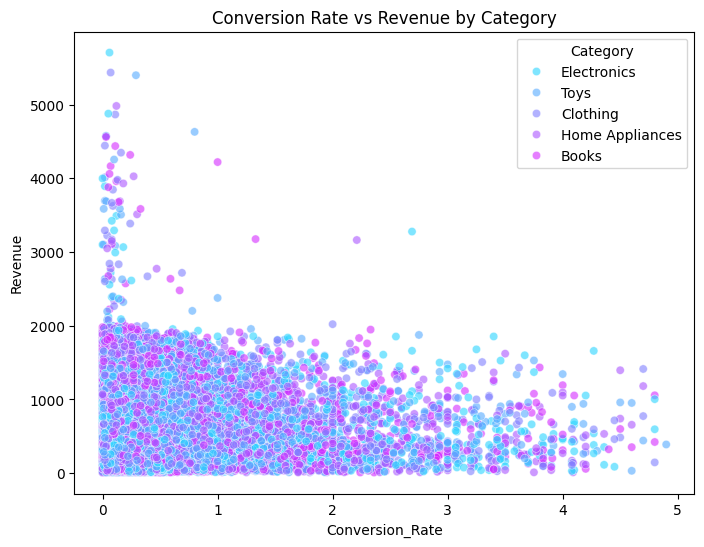

In [21]:
# Ad Spend vs Revenue
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Ad_Spend', y='Revenue', alpha=0.6)
plt.title("Ad Spend vs Revenue")
plt.show()

# Conversion Rate vs Revenue
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Conversion_Rate', y='Revenue', alpha=0.6, hue='Category', palette='cool')
plt.title("Conversion Rate vs Revenue by Category")
plt.show()

Discount Analysis

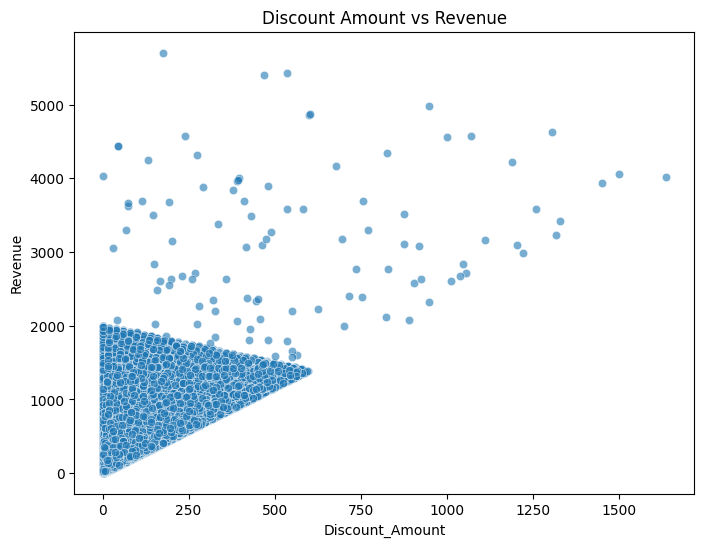

C:\Users\fsukr\AppData\Local\Temp\ipykernel_30060\3494561387.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Category', y='Discount_Amount', palette='pastel')


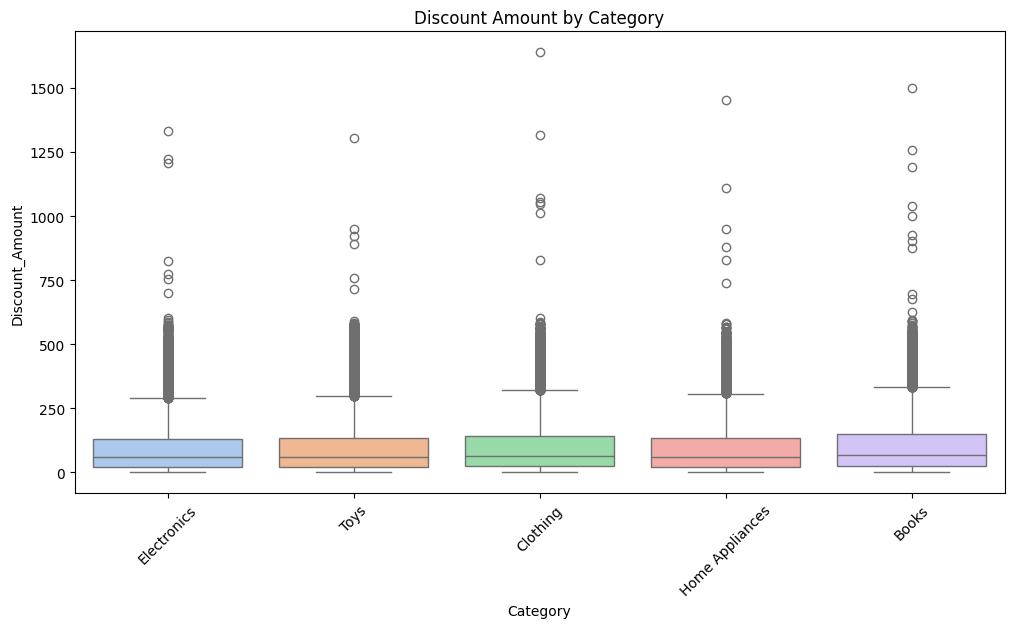

In [25]:
# Discount vs Revenue
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Discount_Amount', y='Revenue', alpha=0.6)
plt.title("Discount Amount vs Revenue")
plt.show()

# Discount Amount by Category
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Category', y='Discount_Amount', palette='pastel')
plt.title("Discount Amount by Category")
plt.xticks(rotation=45)
plt.show()

Time-Based Analysis

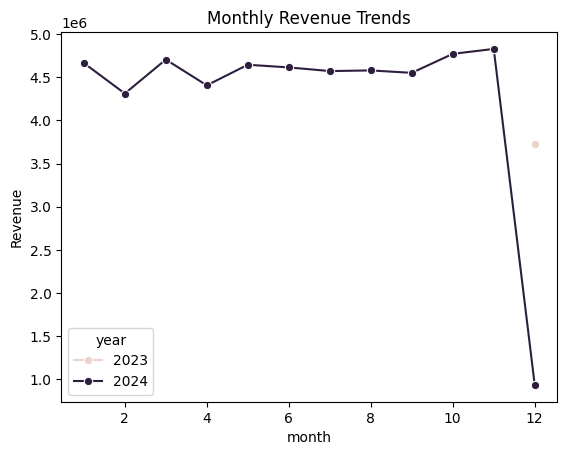

C:\Users\fsukr\AppData\Local\Temp\ipykernel_30060\2603364518.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weekend_revenue, x='Is_Weekend', y='Revenue', palette='Set1')


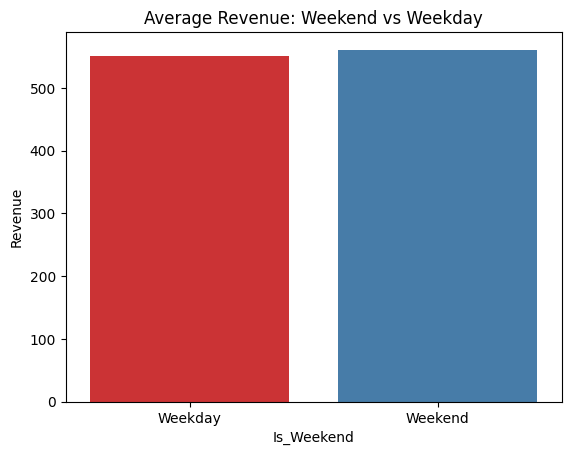

In [29]:
# Monthly Revenue Trends
monthly_revenue = data.groupby(['year', 'month'])['Revenue'].sum().reset_index()
sns.lineplot(data=monthly_revenue, x='month', y='Revenue', hue='year', marker="o")
plt.title("Monthly Revenue Trends")
plt.show()

# Weekend vs Weekday Revenue
weekend_revenue = data.groupby('Is_Weekend')['Revenue'].mean().reset_index()
sns.barplot(data=weekend_revenue, x='Is_Weekend', y='Revenue', palette='Set1')
plt.title("Average Revenue: Weekend vs Weekday")
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.show()

Customer Segmentation

C:\Users\fsukr\AppData\Local\Temp\ipykernel_30060\1701940442.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_customers, x='Revenue', y='Customer_ID', palette='magma')


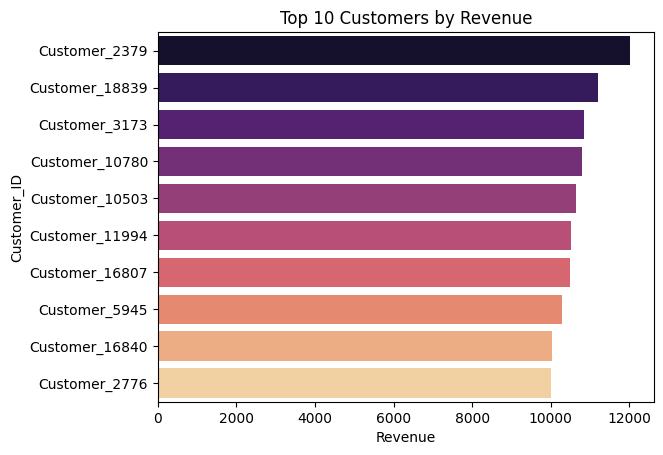

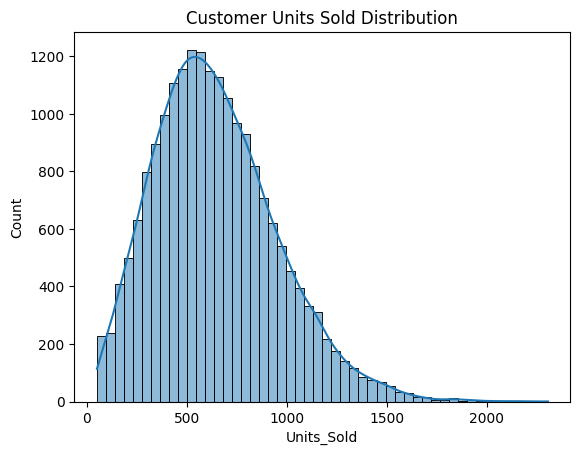

In [30]:
# Top 10 Customers by Revenue
customer_revenue = data.groupby('Customer_ID')['Revenue'].sum().reset_index()
top_customers = customer_revenue.sort_values(by='Revenue', ascending=False).head(10)
sns.barplot(data=top_customers, x='Revenue', y='Customer_ID', palette='magma')
plt.title("Top 10 Customers by Revenue")
plt.show()

# Units Sold by Customer
customer_units = data.groupby('Customer_ID')['Units_Sold'].sum().reset_index()
sns.histplot(customer_units['Units_Sold'], bins=50, kde=True)
plt.title("Customer Units Sold Distribution")
plt.show()

Advertising Effectiveness

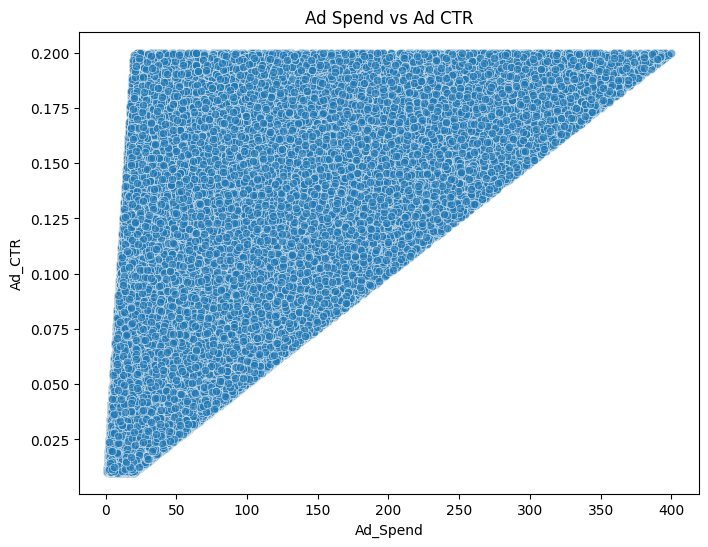

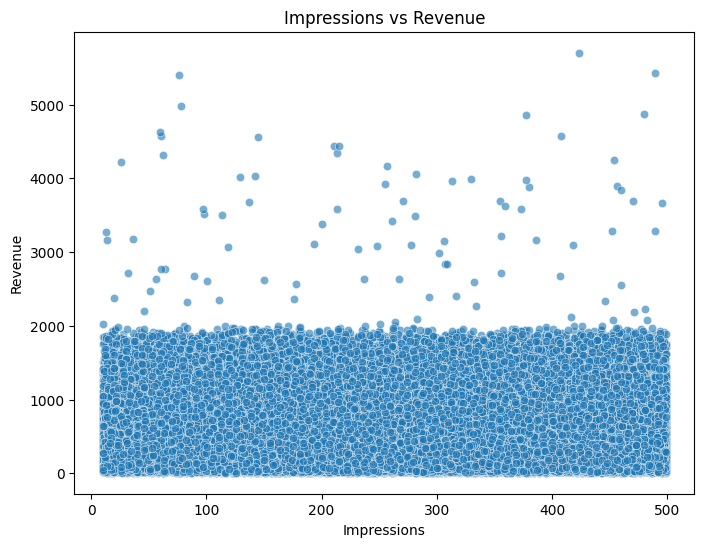

In [31]:
# Ad Spend vs Ad CTR
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Ad_Spend', y='Ad_CTR', alpha=0.6)
plt.title("Ad Spend vs Ad CTR")
plt.show()

# Impressions vs Revenue
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Impressions', y='Revenue', alpha=0.6)
plt.title("Impressions vs Revenue")
plt.show()

### Label encoder

In [39]:
# Check amount of unique value
data[categorical_columns].nunique()

Category       5
Region         3
Day_of_Week    7
Is_Weekend     2
dtype: int64

In [40]:
for column in df[categorical_columns]:
    print(f"Unique values in '{column}': {df[column].unique()}")

Unique values in 'Category': ['Books' 'Clothing' 'Toys' 'Home Appliances' 'Electronics']
Unique values in 'Region': ['Europe' 'Asia' 'North America']
Unique values in 'Day_of_Week': [1 2 3 4 5 6]
Unique values in 'Is_Weekend': [0 1]


In [43]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder_category = LabelEncoder()
label_encoder_region = LabelEncoder()

# Fit and transform 'Category' and 'Region'
data['Category_encoded'] = label_encoder_category.fit_transform(data['Category'])
data['Region_encoded'] = label_encoder_region.fit_transform(data['Region'])

# View unique categories and their encoding
print("Category Encoding:", dict(zip(label_encoder_category.classes_, range(len(label_encoder_category.classes_)))))
print("Region Encoding:", dict(zip(label_encoder_region.classes_, range(len(label_encoder_region.classes_)))))

# Check transformed DataFrame
data.head()

Category Encoding: {'Books': 0, 'Clothing': 1, 'Electronics': 2, 'Home Appliances': 3, 'Toys': 4}
Region Encoding: {'Asia': 0, 'Europe': 1, 'North America': 2}


,Ad_CPC,Ad_CTR,Ad_Spend,Category,Clicks,Conversion_Rate,Customer_ID,Discount_Applied,Impressions,Product_ID,...,Transaction_ID,Units_Sold,Discount_Amount,day,Day_of_Week,Is_Weekend,year,month,Category_encoded,Region_encoded
0,0.41,0.0658,26.98,Electronics,30,0.13,Customer_10077,0.17,236,Product_857,...,a46c6ef7-9948-471f-97b2-9d7fda360f2d,224,66.21,7,5,0,2023,12,2,2
1,1.74,0.1259,219.07,Toys,34,0.10,Customer_935,0.25,342,Product_353,...,56099861-3bfa-47c2-accd-03f0400a5934,79,24.82,7,5,0,2023,12,4,2
2,0.81,0.0862,69.82,Clothing,41,0.56,Customer_11252,0.15,73,Product_880,...,2256430e-788c-44b3-9e64-d88236d7c5e0,118,67.07,7,5,0,2023,12,1,1
3,0.90,0.1560,140.40,Clothing,30,0.18,Customer_9320,0.12,166,Product_159,...,92071bd1-a176-43dd-b7d1-bfe2521876d9,76,44.33,7,5,0,2023,12,1,1
4,1.38,0.1674,231.01,Home Appliances,28,0.68,Customer_9297,0.30,41,Product_731,...,b085fdef-2099-4b2d-a9c9-e5896e8b78a4,169,57.42,7,5,0,2023,12,3,1


### Correlation Heatmap  

In [52]:
numerical_columns

['Revenue',
 'Units_Sold',
 'Discount_Applied',
 'Discount_Amount',
 'Clicks',
 'Impressions',
 'Conversion_Rate',
 'Ad_CTR',
 'Ad_CPC',
 'Ad_Spend']

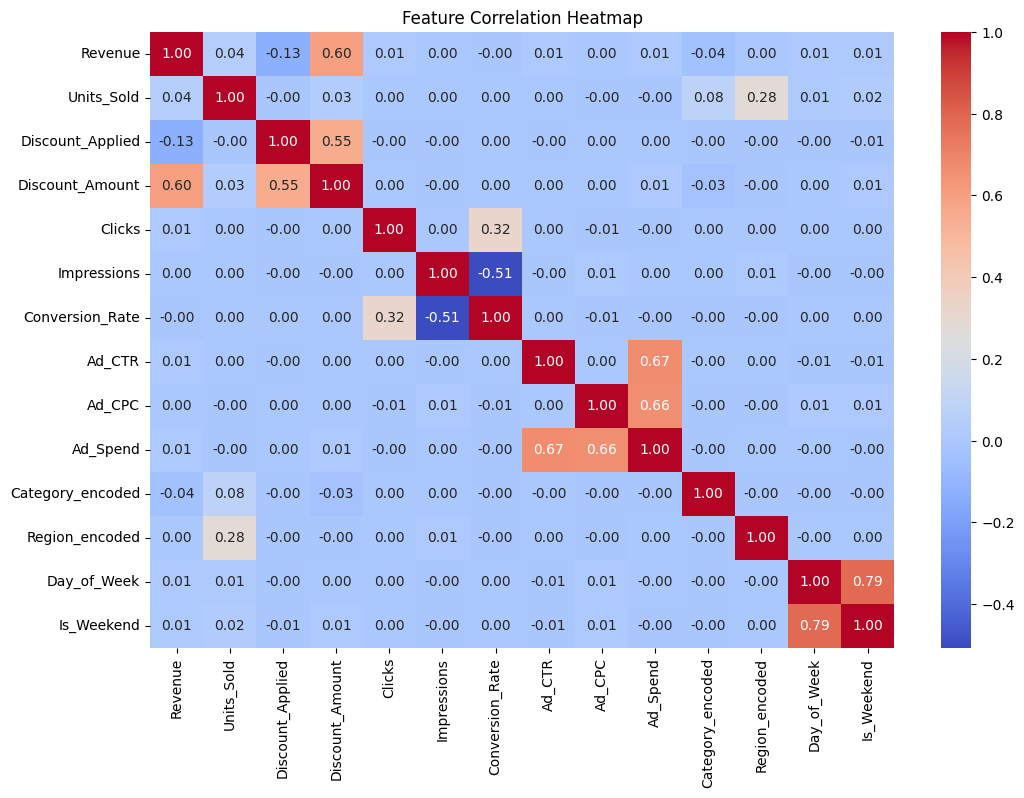

In [54]:
# Compute correlation matrix
correlation_column = ['Revenue',
 'Units_Sold',
 'Discount_Applied',
 'Discount_Amount',
 'Clicks',
 'Impressions',
 'Conversion_Rate',
 'Ad_CTR',
 'Ad_CPC',
 'Ad_Spend',
 'Category_encoded',
 'Region_encoded',
 'Day_of_Week',
 'Is_Weekend']
correlation_matrix = data[correlation_column].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

## Feature Engineering

### Customer behavior metrics

Capture patterns in customer activity:

Total Transactions: Count the number of transactions per customer.

Average Transaction Value: Revenue aggregated by customer.

Customer Lifetime Revenue: Sum of Revenue per customer.

In [55]:
customer_features = data.groupby('Customer_ID').agg({
    'Revenue': ['sum', 'mean', 'count']}).reset_index()
customer_features.columns = ['Customer_ID', 'Total_Revenue', 'Avg_Revenue', 'Total_Transactions']

In [63]:
customer_features.sort_values('Total_Transactions',ascending=False).head(10)

,Customer_ID,Total_Revenue,Avg_Revenue,Total_Transactions
7440,Customer_16743,9348.48,519.360000,18
11648,Customer_256,7979.67,469.392353,17
1715,Customer_11552,8257.03,550.468667,15
9445,Customer_18564,8901.49,593.432667,15
11451,Customer_2380,7473.44,533.817143,14
9057,Customer_18212,9032.29,645.163571,14
10524,Customer_19539,7293.96,520.997143,14
7155,Customer_16483,8069.25,576.375000,14
1805,Customer_11634,6399.46,457.104286,14
8318,Customer_17540,8293.48,592.391429,14


### Product performance mertrics

Summarize performance metrics for products:

Product Popularity: Number of times each product was sold.

Average Discount for Product: Mean Discount_Applied for each product.

Category-Level Aggregates: Revenue and units sold grouped by Category.

In [65]:
product_features = data.groupby('Product_ID').agg({
    'Units_Sold': 'sum',
    'Revenue': 'sum',
    'Discount_Amount': 'mean'
}).reset_index()
product_features.columns = ['Product_ID', 'Total_Units_Sold', 'Total_Revenue', 'Avg_Discount_Amount']

In [67]:
product_features.sort_values('Avg_Discount_Amount',ascending=False).head(10)

,Product_ID,Total_Units_Sold,Total_Revenue,Avg_Discount_Amount
238,Product_312,13171,104640.42,231.549785
577,Product_618,12416,104493.00,217.722347
113,Product_20,13315,103728.96,213.367143
14,Product_110,10751,105482.02,207.261979
765,Product_788,9611,79949.25,203.971707
23,Product_119,13082,101123.11,203.865545
310,Product_378,11922,96956.58,202.671398
569,Product_610,13260,103500.13,201.275326
738,Product_763,13125,120157.60,199.925946
828,Product_844,11900,90520.18,199.631310


### Feature engineering add to dataset

Advertising Efficiency Metrics

Quantify the effectiveness of ad campaigns:

CPA (Cost Per Acquisition): Ad spend divided by the number of conversions (Units_Sold).

ROI (Return on Investment): (Revenue - Ad_Spend) / Ad_Spend.

In [69]:
data['CPA'] = data['Ad_Spend'] / data['Units_Sold']
data['ROI'] = (data['Revenue'] - data['Ad_Spend']) / data['Ad_Spend']

Revenue Normalization

Normalize revenue to account for varying transaction sizes:

Revenue per Unit: Revenue / Units_Sold.

Revenue per Click: Revenue / Clicks.

In [68]:
data['Revenue_per_Unit'] = data['Revenue'] / data['Units_Sold']
data['Revenue_per_Click'] = data['Revenue'] / data['Clicks']

Combine existing features to create interactions:

Revenue to Ad Spend Ratio: Revenue / Ad_Spend.

Revenue to Impression Ratio: Revenue / Impressions.

In [70]:
data['Revenue_to_Ad_Spend'] = data['Revenue'] / data['Ad_Spend']
data['Revenue_to_Impressions'] = data['Revenue'] / data['Impressions']

## Key takeaways

Key Takeaways
Univariate Analysis: Identify data distributions, outliers, and dominant categories.

Bivariate Analysis: Explore relationships, dependencies, and interactions between key variables.

Correlation Heatmap: Highlight strong and weak feature correlations for model feature selection.

Additional Analyses: Focus on customer behavior and product performance metrics

Feature engineering: Add metric that can use in analytic in ads and revenue

## Export data

In [76]:
# Export data to data directory
csv_file_path = "data/exported_data.csv"
data.to_csv(csv_file_path, index=False)